In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [16]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)

# Below, t is a table; x and y are column indices or labels.

def correlation(t, x, y):
    """The correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) -slope(t, x, y) * np.mean(t.column(x))

def fitted_values(t, x, y):
    """The fitted values along the regression line."""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [17]:
galton = Table.read_table('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
)

In [18]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [19]:
heights = heights.with_columns('Fitted', fitted_values(heights, 0, 1))
heights

MidParent,Child,Fitted
75.43,73.2,70.7124
75.43,69.2,70.7124
75.43,69,70.7124
75.43,69,70.7124
73.66,73.5,69.5842
73.66,72.5,69.5842
73.66,65.5,69.5842
73.66,65.5,69.5842
72.06,71,68.5645
72.06,68,68.5645


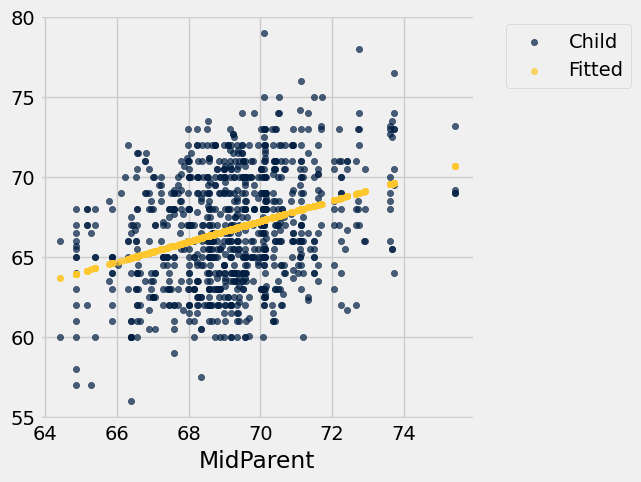

In [20]:
heights.scatter(0)

In [21]:
def residuals(t, x, y):
    return t.column(y) - fitted_values(t, x, y)

In [23]:
heights = heights.with_columns('Residual', residuals(heights, 'MidParent', 'Child'))
heights

MidParent,Child,Fitted,Residual
75.43,73.2,70.7124,2.48763
75.43,69.2,70.7124,-1.51237
75.43,69,70.7124,-1.71237
75.43,69,70.7124,-1.71237
73.66,73.5,69.5842,3.91576
73.66,72.5,69.5842,2.91576
73.66,65.5,69.5842,-4.08424
73.66,65.5,69.5842,-4.08424
72.06,71,68.5645,2.43553
72.06,68,68.5645,-0.564467


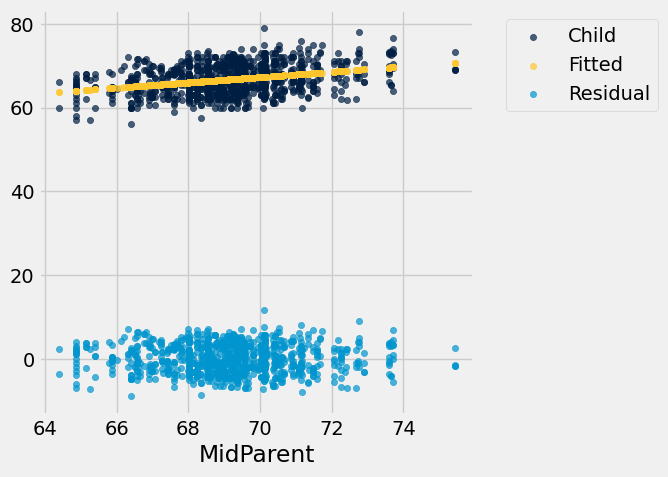

In [24]:
heights.scatter(0)

In [26]:
def plot_residuals(t, x, y):
    with_residuals = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    with_residuals.select(x, y, 'Fitted').scatter(0)
    with_residuals.scatter(x, 'Residual')

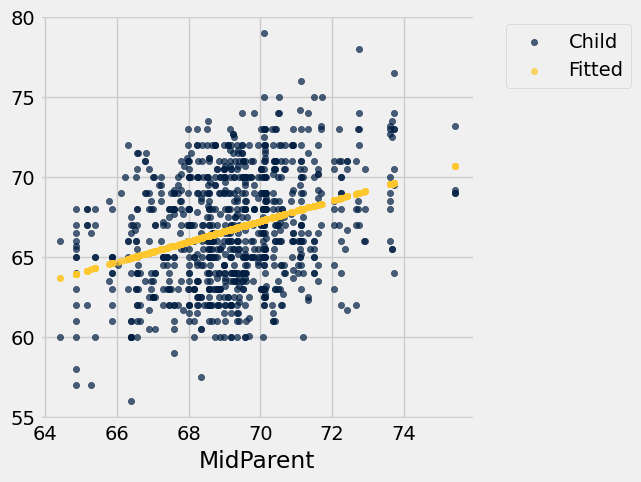

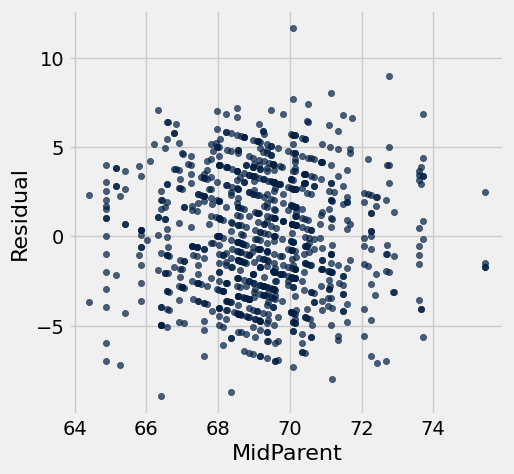

In [27]:
plot_residuals(heights, 'MidParent', 'Child')